<a href="https://colab.research.google.com/github/khairuldzulqarnain/hotel_cancellation_prediction/blob/main/HotelPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Can you predict if the customer is going to honor the reservation or cancel it ?**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Hotel_Reservations.csv")


# **Data Exploration**


In [3]:
df.info()
## The data is cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
# Assuming df is your DataFrame containing the 'booking_status' column

# Use replace() to replace values in 'booking_status' column
df['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0}, inplace=True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [6]:
df.isnull().sum()
# No Missing values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# Data Visualisation

In [29]:
df.no_of_adults.value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

<ipython-input-20-e4f7c2401664>:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df, x='no_of_adults', hue='booking_status', palette=sns.palettes.mpl_palette('Dark2'))


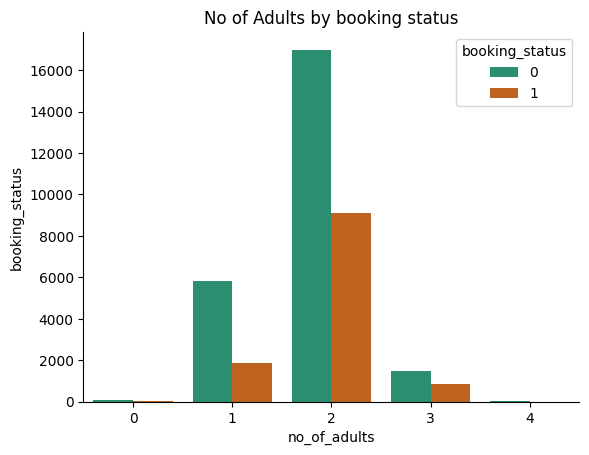

In [20]:
sns.countplot(data=df, x='no_of_adults', hue='booking_status', palette=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('no_of_adults')
plt.ylabel('booking_status')
plt.title('No of Adults by booking status')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [30]:
df.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

<ipython-input-32-a88a1bbab76d>:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df, x='repeated_guest', hue='booking_status', palette=sns.palettes.mpl_palette('Dark2'))


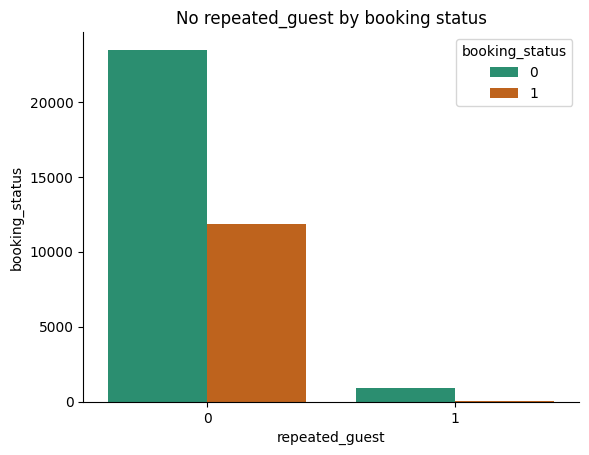

In [32]:
sns.countplot(data=df, x='repeated_guest', hue='booking_status', palette=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('repeated_guest')
plt.ylabel('booking_status')
plt.title('No repeated_guest by booking status')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

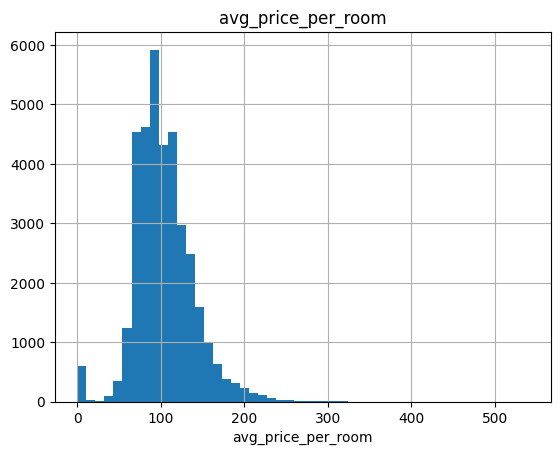

In [7]:
df['avg_price_per_room'].hist(bins=50)

plt.title('avg_price_per_room')
plt.xlabel('avg_price_per_room')
plt.show()

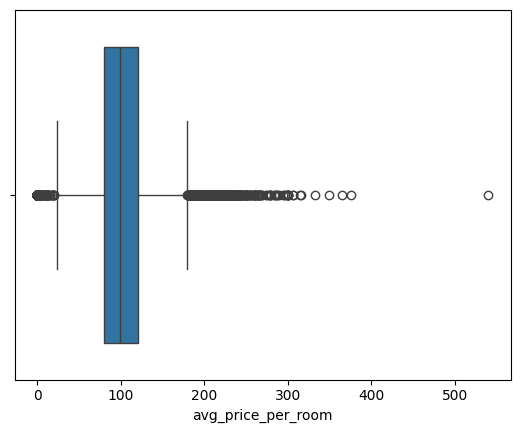

In [8]:
# Boxplot for checking outliers
sns.boxplot(x=df['avg_price_per_room'])
plt.show()

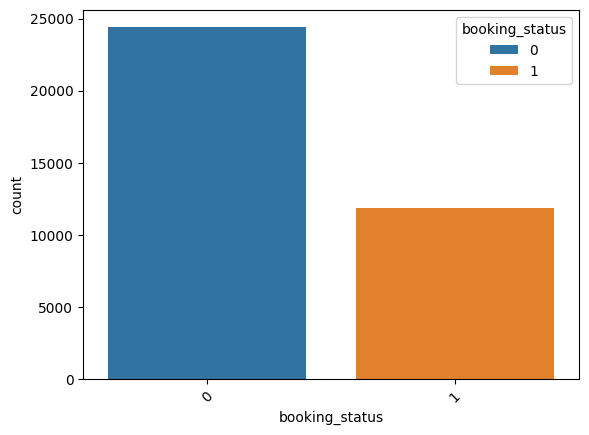

In [9]:
sns.countplot(x='booking_status', hue='booking_status', data=df)
plt.xticks(rotation=45)
plt.show()

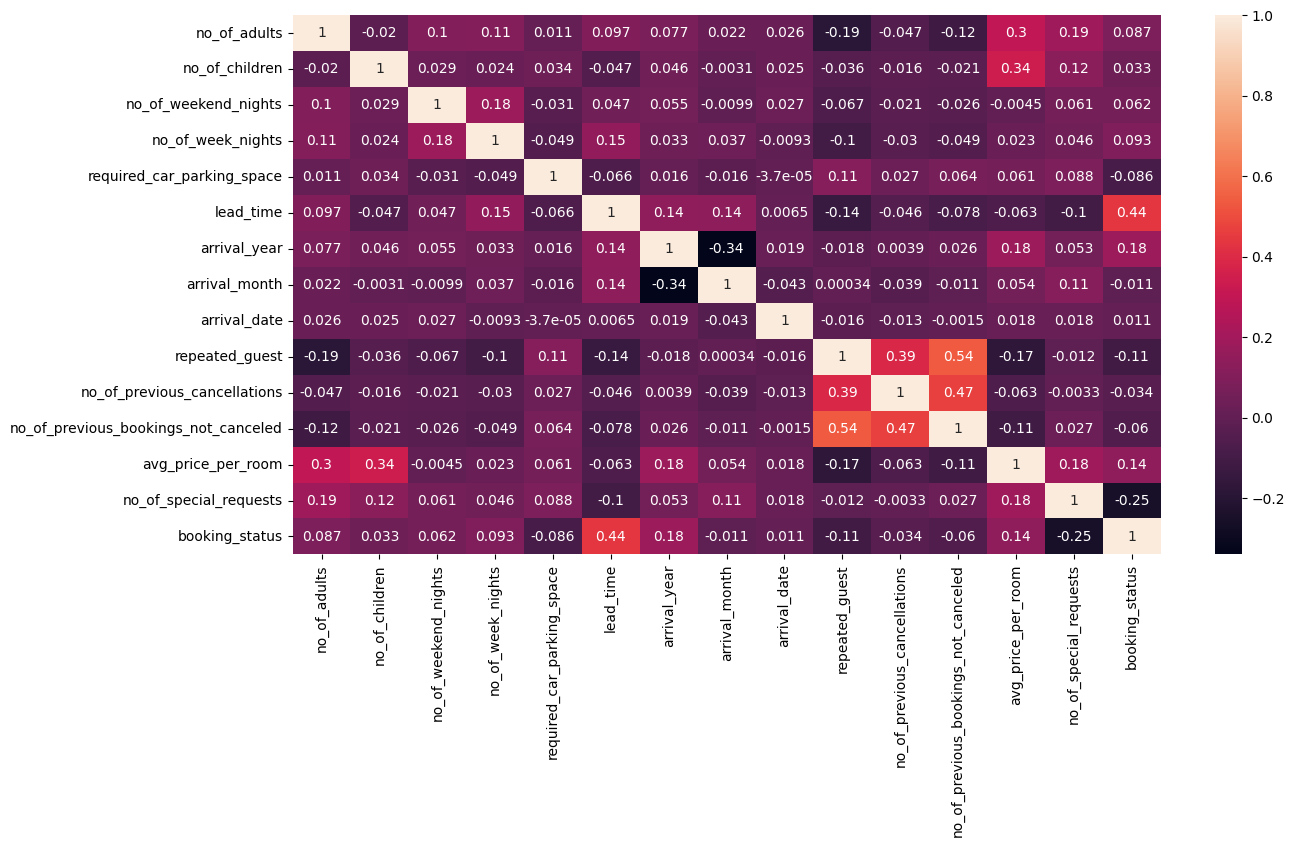

In [10]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(14, 7))
# Explicitly specify numeric_only=True to avoid future issues
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Based on correlation table above

1) No of adults related with avg price per room

2) No of adults related with no of special requests

3) No of required car park is higher for repeated guest

4) No of previous booking **not cancelled** is higest for repeated guests

5) No of previous booking **cancelled** is higher for repeated guests

6) No of previous cancellations is higher for no of previous booking not canceled



In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


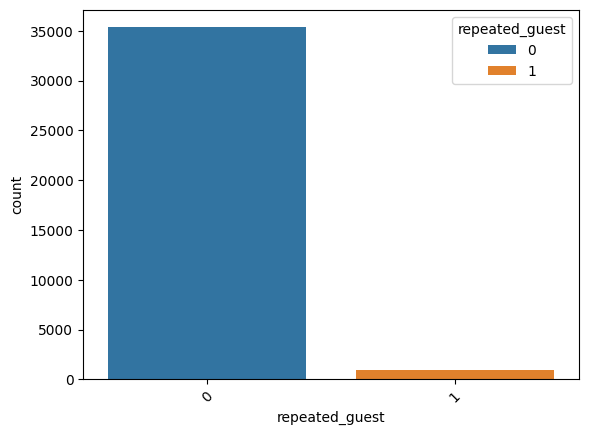

In [12]:
sns.countplot(x='repeated_guest', hue='repeated_guest', data=df)
plt.xticks(rotation=45)
plt.show()

## No of repeated guest is lower

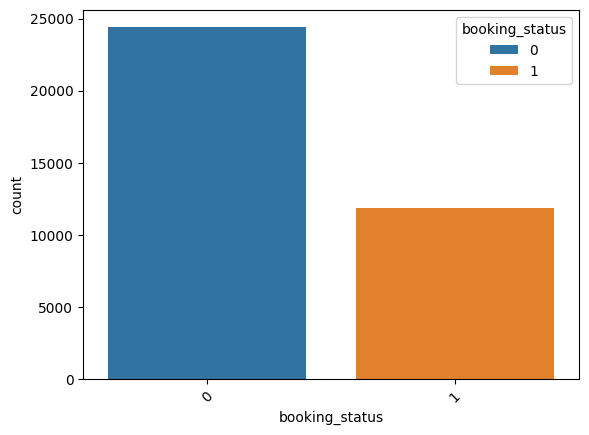

In [13]:
sns.countplot(x='booking_status',  hue='booking_status', data=df)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'special_requests')

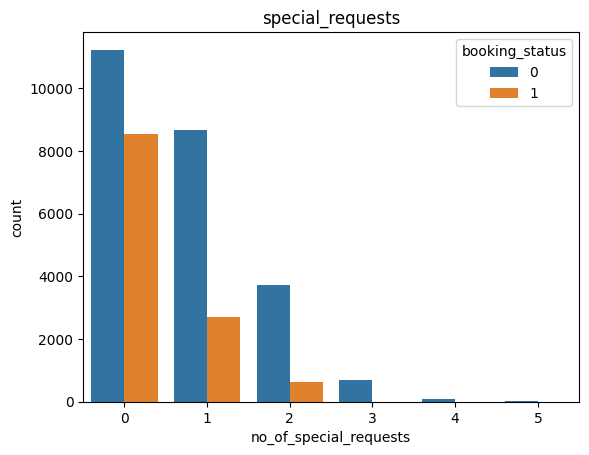

In [14]:
sns.countplot(x='no_of_special_requests', hue='booking_status',data=df)

plt.title('special_requests')


array([<Axes: ylabel='count'>], dtype=object)

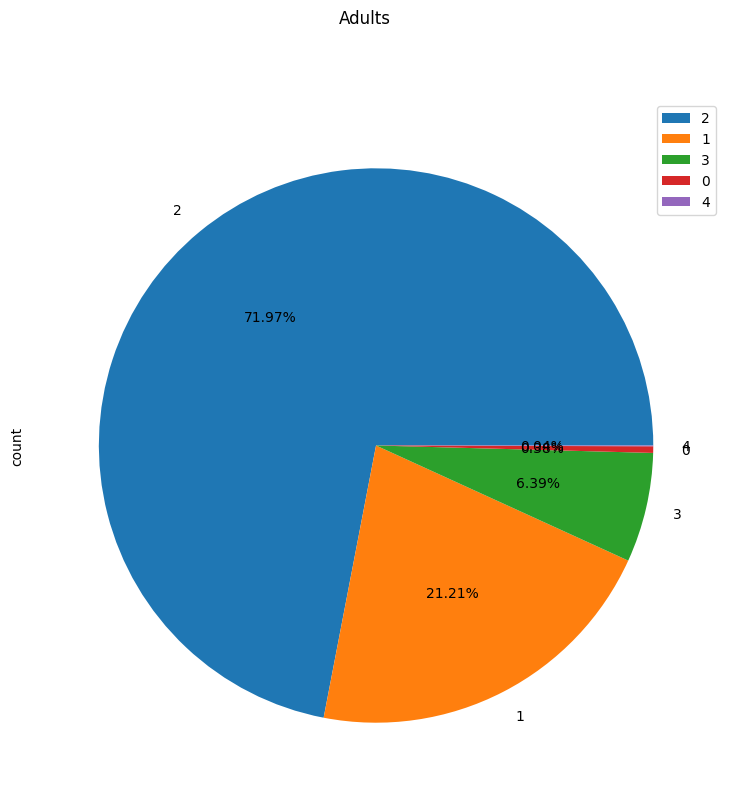

In [33]:
df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Adults',figsize=(9,9))

# Mechine Learning

In [34]:
df


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


In [35]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [36]:
df.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [38]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
## Model (decision tree)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



train_df, test_df = train_test_split (df, test_size= 0.2)

In [ ]:
train_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
13924,INN13925,2,0,1,1,Meal Plan 2,0,Room_Type 1,301,2018,7,30,Offline,0,0,0,115.00,1,1
2191,INN02192,3,0,0,1,Meal Plan 1,0,Room_Type 4,63,2018,7,28,Online,0,0,0,137.70,2,0
4957,INN04958,1,0,0,1,Meal Plan 1,0,Room_Type 4,5,2018,4,20,Online,0,0,0,89.32,0,0
23966,INN23967,2,0,0,1,Not Selected,0,Room_Type 1,58,2018,9,8,Online,0,0,0,125.10,0,1
7532,INN07533,2,2,4,7,Meal Plan 1,0,Room_Type 1,9,2018,8,28,Corporate,0,0,0,96.00,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32199,INN32200,2,0,0,1,Meal Plan 1,1,Room_Type 1,1,2018,1,6,Online,0,0,0,107.00,0,0
33779,INN33780,1,0,1,2,Meal Plan 1,0,Room_Type 1,141,2018,8,22,Online,0,0,0,77.62,0,0
21755,INN21756,2,2,3,5,Meal Plan 2,0,Room_Type 6,155,2018,7,10,Online,0,0,0,218.03,2,1
7270,INN07271,1,0,0,1,Meal Plan 1,0,Room_Type 1,177,2018,7,30,Online,0,0,0,99.90,0,1
